In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('brain_stroke.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type

In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [6]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Looking for the categorical columns which needs to be LabelEncoded


In [8]:
categorical_columns = []
for c in df.columns:
    if (df [c].dtype == object):
        categorical_columns.append(c)
categorical_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [9]:
numerical_columns = []
for col in df.columns:
  if(df[col].dtype != object):
    numerical_columns.append(col)
numerical_columns

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

**Exploratory Data Analysis**

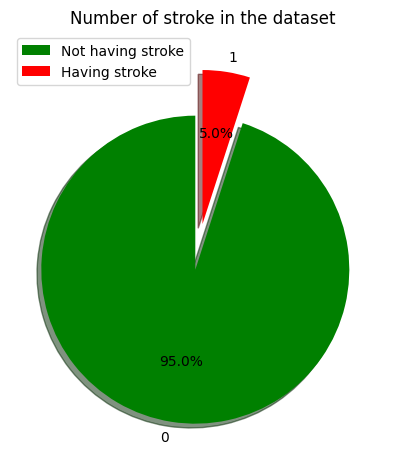

In [10]:
import matplotlib.pyplot as plt

labels = df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)
colors = ["green","red"]
expd = (0.3,0) 
plt.figure(figsize=(5,5))
plt.pie(sizes,explode=expd,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Number of stroke in the dataset')
plt.legend(["Not having stroke" , "Having stroke"])
plt.show()

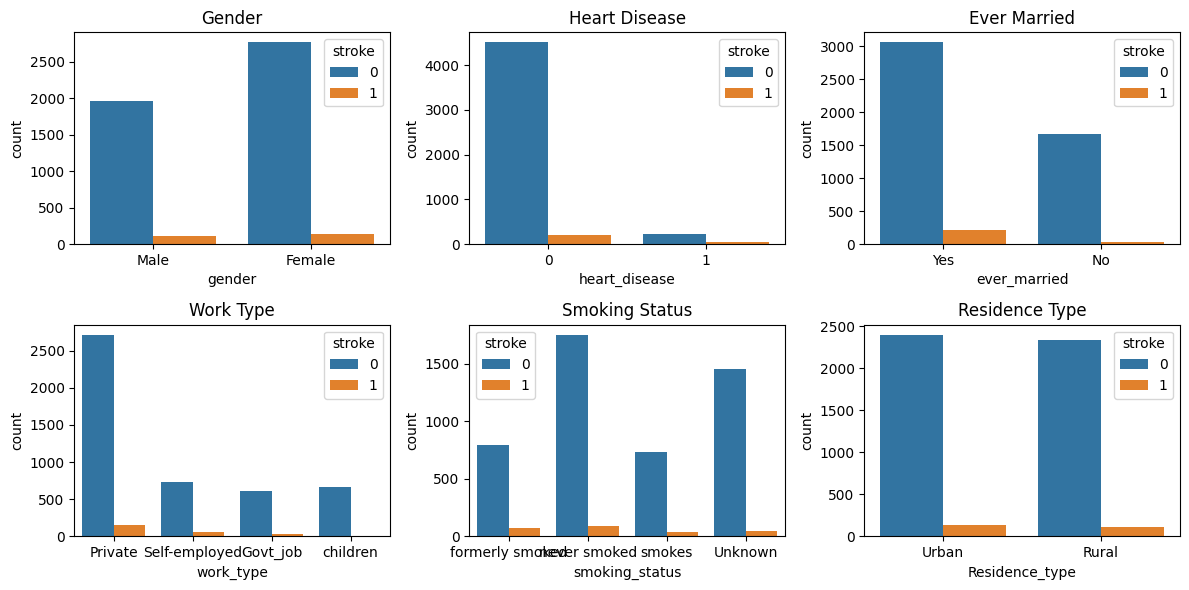

In [11]:
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(14,6))

# Plot countplot for gender
sns.countplot(x='gender', hue='stroke', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Gender')

# Plot countplot for heart disease
sns.countplot(x='heart_disease', hue='stroke', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Heart Disease')

# Plot countplot for ever married
sns.countplot(x='ever_married', hue='stroke', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Ever Married')

# Plot countplot for work type
sns.countplot(x='work_type', hue='stroke', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Work Type')

# Plot countplot for smoking status
sns.countplot(x='smoking_status', hue='stroke', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Smoking Status')

# Plot countplot for residence type
sns.countplot(x='Residence_type', hue='stroke', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Residence Type')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

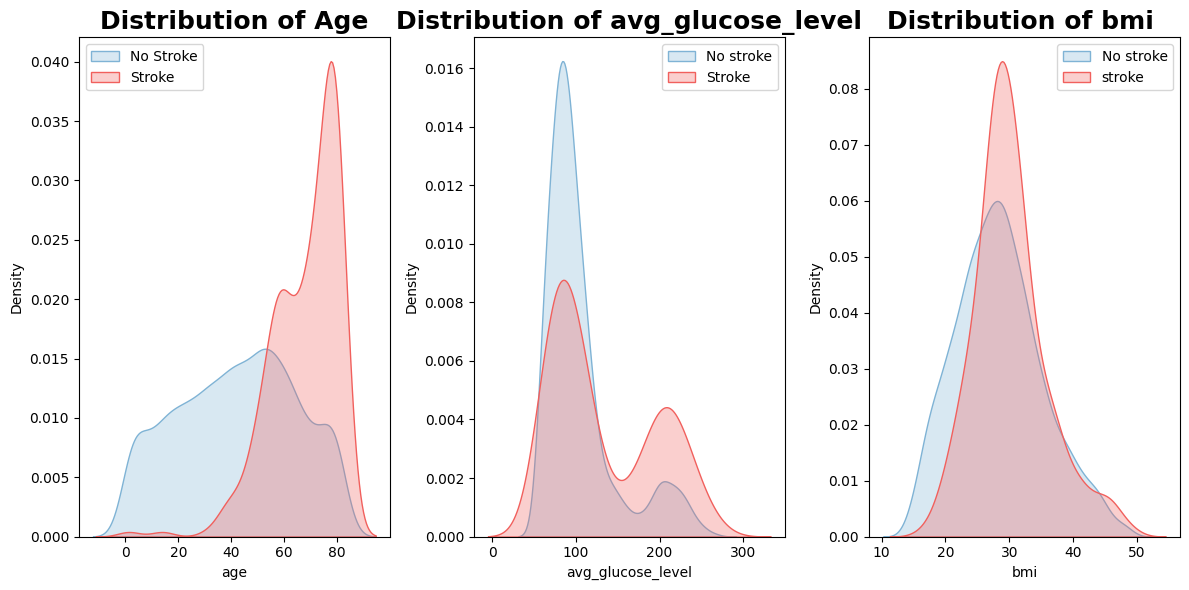

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(12,6))

# Plot KDE plot for age
sns.kdeplot(data=df[df['stroke'] == 0], x='age', color='#7FB3D5', fill=True, alpha=0.3, ax=axes[0])
sns.kdeplot(data=df[df['stroke'] == 1], x='age', color='#F1605D', fill=True, alpha=0.3, ax=axes[0])
axes[0].legend(['No Stroke', 'Stroke'], loc='upper left')
axes[0].set_title("Distribution of Age",fontdict={'fontweight': 'bold', 'size':18})


sns.kdeplot(data=df[df['stroke']==0],x='avg_glucose_level',color='#7FB3D5', fill=True,alpha=0.3, ax=axes[1])
sns.kdeplot(data=df[df['stroke']==1],x='avg_glucose_level',color='#F1605D', fill=True,alpha=0.3, ax=axes[1])
axes[1].set_title("Distribution of avg_glucose_level",fontdict={'fontweight': 'bold', 'size':18})
axes[1].legend(['No stroke' , 'Stroke'],loc = 'upper right')

sns.kdeplot(data=df[df['stroke']==0],x='bmi',color='#7FB3D5', fill=True,alpha=0.3,ax=axes[2])
sns.kdeplot(data=df[df['stroke']==1],x='bmi',color='#F1605D', fill=True,alpha=0.3,ax=axes[2])
axes[2].set_title("Distribution of bmi ",fontdict={'fontweight': 'bold', 'size':18})
axes[2].legend(['No stroke' , 'stroke'],loc = 'upper right')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



[]

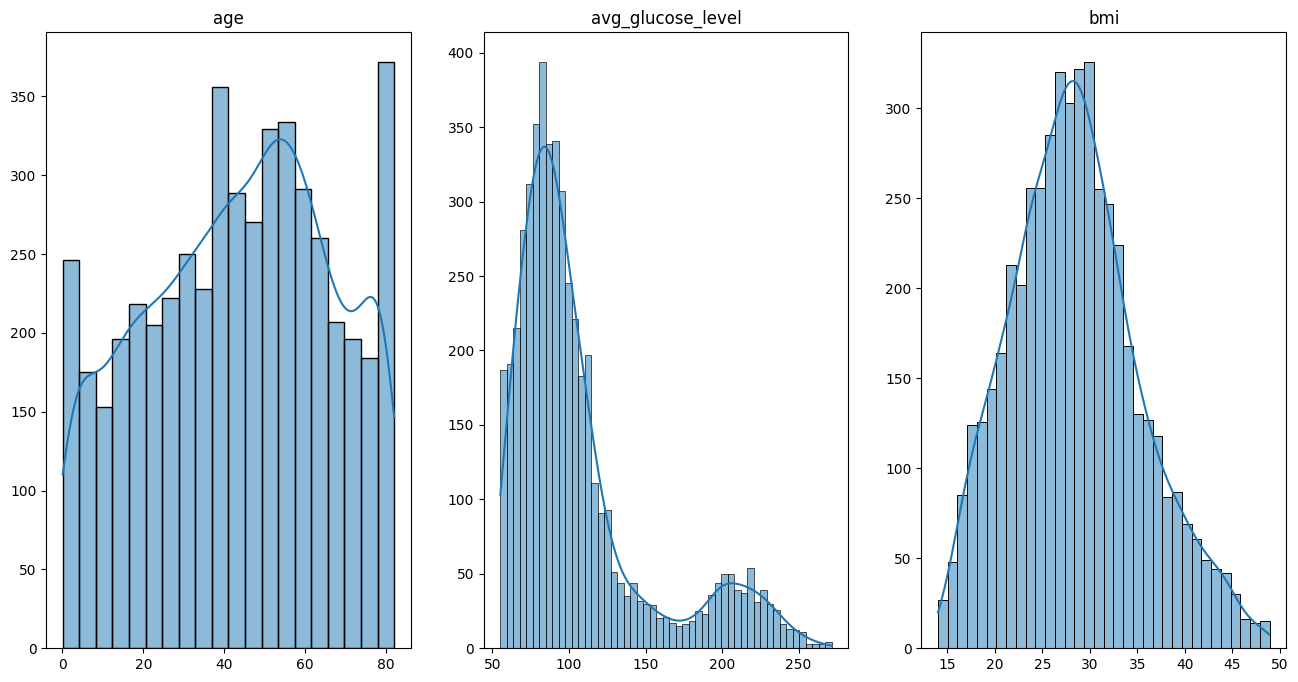

In [13]:
cols = ['age', 'avg_glucose_level', 'bmi']
plt.figure(figsize = (16, 8))
idx = 0
for i in cols:
    plt.subplot(1,3,idx+1)
    sns.histplot(x = df[i],kde = True)
    plt.ylabel(None)
    plt.title(i)
    plt.xlabel(None)
    idx+=1
    
plt.plot()


In [14]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:
  encoder= LabelEncoder()
  df[col] = encoder.fit_transform(df[col])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [15]:
numerical_columns

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [16]:

to_remove =['stroke','hypertension','heart_disease']
for i in to_remove :
  numerical_columns.remove(i)

In [17]:
numerical_columns

['age', 'avg_glucose_level', 'bmi']

In [18]:
X = df.drop('stroke', axis=1)
y =df['stroke']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [20]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.67, stratify=y_test)


In [21]:
X_train.shape , y_train.shape

((3486, 10), (3486,))

In [22]:
X_val.shape , y_val.shape

((493, 10), (493,))

In [23]:
import xgboost as xgb
# import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [24]:
models = [LogisticRegression() ,
          DecisionTreeClassifier(), 
          RandomForestClassifier(),
          BernoulliNB(),
          GaussianNB(),
          SVC(),
          KNeighborsClassifier(),
          GradientBoostingClassifier(),
          AdaBoostClassifier(),
          xgb.XGBClassifier(),
        #   lgb.LGBMClassifier()
        ]

In [25]:

model_names = ['LogisticRegression',
               'DecisionTreeClassifier',
               'RandomForestClassifier',
               'BernoulliNB',
               'GaussianNB',
               'Support Vector Machine',
               'K-Nearest Neighbors',
               'GradientBoostingClassifier',
               'AdaBoost',
               'XGBClassifier',
            #    'LightGBM'
            ]

In [26]:
Precision = []
Recall = []
ROC = []
F1 = []

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve

def training_summary(x_train, y_train, x_val, y_val, model_name , model):
  model.fit(x_train, y_train)
  prediction = model.predict(x_val)
  precision = precision_score(y_val, prediction, zero_division=1)*100
  recall = recall_score(y_val, prediction)*100
  roc = roc_auc_score(y_val,prediction)*100
  f1 = f1_score(y_val,prediction)*100

  print("Model Name: ",model_name)
  print("Precision:", precision)
  print("Recall:", recall)
  print("ROC AUC:", roc)
  print("F1 Score:", f1)
  
  Precision.append(precision)
  Recall.append(recall)
  ROC.append(roc)
  F1.append(f1)

In [28]:
def evaluate_classifiers(x_train,y_train,x_val,y_val):
  training_summary(x_train,y_train, x_val, y_val, 'LogisticRegression',LogisticRegression(max_iter=1000))
  training_summary(x_train,y_train, x_val, y_val, 'DecisionTreeClassifier',DecisionTreeClassifier())
  training_summary(x_train,y_train, x_val, y_val, 'RandomForestClassifier',RandomForestClassifier(n_estimators=50,n_jobs=-1))   
  training_summary(x_train,y_train, x_val, y_val, 'BernoulliNB',BernoulliNB())
  training_summary(x_train,y_train, x_val, y_val, 'GaussianNB',GaussianNB())
  training_summary(x_train,y_train, x_val, y_val, 'Support Vector Machine',SVC())
  training_summary(x_train,y_train, x_val, y_val, 'K-Nearest Neighbors',KNeighborsClassifier(n_neighbors=1,algorithm='kd_tree',weights='uniform'))
  training_summary(x_train,y_train, x_val, y_val, 'GradientBoostingClassifier',GradientBoostingClassifier(learning_rate=0.1,loss='exponential',max_depth=70,max_features=2,n_estimators=300))
  training_summary(x_train,y_train, x_val, y_val, 'AdaBoost', AdaBoostClassifier(n_estimators=100, base_estimator=DecisionTreeClassifier(max_depth=1)))
  training_summary(x_train,y_train, x_val, y_val, 'XGBClassifier',xgb.XGBClassifier())
  # training_summary(x_train,y_train,x_val,y_val, 'LightGBM',lgb.LGBMClassifier())


In [29]:
evaluate_classifiers(X_train,y_train,X_val,y_val)

Model Name:  LogisticRegression
Precision: 100.0
Recall: 0.0
ROC AUC: 50.0
F1 Score: 0.0
Model Name:  DecisionTreeClassifier
Precision: 17.647058823529413
Recall: 25.0
ROC AUC: 59.51492537313433
F1 Score: 20.689655172413794
Model Name:  RandomForestClassifier
Precision: 100.0
Recall: 0.0
ROC AUC: 50.0
F1 Score: 0.0
Model Name:  BernoulliNB
Precision: 100.0
Recall: 0.0
ROC AUC: 50.0
F1 Score: 0.0
Model Name:  GaussianNB
Precision: 16.176470588235293
Recall: 45.83333333333333
ROC AUC: 66.83990760483299
F1 Score: 23.91304347826087
Model Name:  Support Vector Machine
Precision: 100.0
Recall: 0.0
ROC AUC: 50.0
F1 Score: 0.0
Model Name:  K-Nearest Neighbors
Precision: 7.6923076923076925
Recall: 8.333333333333332
ROC AUC: 51.60803127221038
F1 Score: 8.0
Model Name:  GradientBoostingClassifier
Precision: 0.0
Recall: 0.0
ROC AUC: 49.68017057569296
F1 Score: 0.0
Model Name:  AdaBoost
Precision: 100.0
Recall: 0.0
ROC AUC: 50.0
F1 Score: 0.0
Model Name:  XGBClassifier
Precision: 0.0
Recall: 0.0
RO

Comaprison of models

In [30]:
print("Model Names Length:", len(model_names))
print("Precision Length:", len(Precision))
print("Recall Length:", len(Recall))
print("ROC Length:", len(ROC))
print("F1 Length:", len(F1))


Model Names Length: 10
Precision Length: 10
Recall Length: 10
ROC Length: 10
F1 Length: 10


In [38]:
compare_classifiers = pd.DataFrame({'Model': model_names,'Precision': Precision, 'Recall': Recall, 'ROC_AUC_Score' : ROC,'F1_score' : F1})


In [39]:
from sklearn.metrics import accuracy_score

# Define a list to store accuracy scores
accuracy_scores = []

# Evaluate accuracy for each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)

# Add accuracy scores to the DataFrame
compare_classifiers['Accuracy'] = accuracy_scores

# Display the DataFrame
compare_classifiers
compare_classifiers.style.background_gradient(high=1,axis=0)

,Model,Precision,Recall,ROC_AUC_Score,F1_score,Accuracy
0,LogisticRegression,100.000000,0.000000,50.000000,0.000000,0.951318
1,DecisionTreeClassifier,17.647059,25.000000,59.514925,20.689655,0.894523
2,RandomForestClassifier,100.000000,0.000000,50.000000,0.000000,0.949290
3,BernoulliNB,100.000000,0.000000,50.000000,0.000000,0.951318
4,GaussianNB,16.176471,45.833333,66.839908,23.913043,0.858012
5,Support Vector Machine,100.000000,0.000000,50.000000,0.000000,0.951318
6,K-Nearest Neighbors,7.692308,8.333333,51.608031,8.000000,0.941176
7,GradientBoostingClassifier,0.000000,0.000000,49.680171,0.000000,0.951318
8,AdaBoost,100.000000,0.000000,50.000000,0.000000,0.951318
9,XGBClassifier,0.000000,0.000000,49.147122,0.000000,0.935091
